# Compare LC of runs

The goal is to compare LC curves of different runs.
1. Same model across different datasets.
2. Same dataset across different models.


Overall workflow:
1. LS-HPO to find the model HPs
2. Using HPs from LS-HPO generate LC across multiple seeds
3. Aggregate results across multiple seeds by computing median per shard
4. Fit power-law to the aggregated data

Which steps are completed:
1. LS-HPO was not properly done to anyone of the datasets. Only partial ranges have been explored.<br>
PS-HPO runs are executed using LGBM for CTRP and GDSC on theta.
2. ...

- https://www.youtube.com/watch?v=Jl-Ye38qkRc
- https://www.youtube.com/watch?v=4vryPwLtjIY

In [138]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path

import sklearn
import numpy as np
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.pyplot as plt

# Make all python scripts available in the path
sys.path.append('../')

import pp_utils
import lrn_crv_plot
# from keras.models import load_model
%matplotlib inline

filepath = Path(os.getcwd())
print(filepath)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/vol/ml/apartin/projects/LearningCurves/notebooks


### GDSC

In [104]:
# GDSC
maindir = filepath / '../trn.gdsc/'  # Results dir

lgb_reg_dir = maindir / 'hpo_lgbm/trn.gdsc/split_on_none/gdsc.lgb_reg.cvf1.GE.DD.AUC_2019-11-21_h10-m10'
nn_reg0_dir = maindir / 'split_on_none/gdsc.adam.nn_reg0.cvf1.ge.dd.auc_2019-11-20_LS_best_hps_earlystop_valmae'
nn_reg0_dlft_valmae_dir = maindir / 'split_on_none/gdsc.sgd.nn_reg0.cvf1.ge.dd.auc_2019-11-20_defaults_earlystop_valmae'

runs   = [lgb_reg_dir, nn_reg0_dir]
labels = ['lgb_reg', 'nn_reg0']

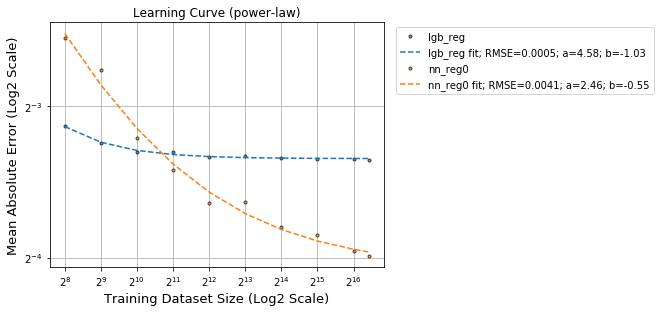

In [105]:
plot_kwargs = {'metric_name': 'mean_absolute_error', 'tr_set': 'te', 'figsize': (6, 4.5), 'xtick_scale': 'log2', 'ytick_scale': 'log2'}
shard_min_idx=1

pp_utils.fit_lc_multi_runs( runs=runs, labels=labels, shard_min_idx=shard_min_idx, **plot_kwargs )

### CTRP

In [121]:
# CTRP
maindir = filepath / '../ctrp_trn/'  # Results dir

lgb_reg_dir = maindir / 'split_on_none/ctrp.adam.nn_reg0.cvf1.ge.dd.auc_2019-11-18'
nn_reg0_1_dir = maindir / 'split_on_none/ctrp.lgb_reg.cvf1.ge.dd.auc_2019-11-4_h16-m38'
nn_reg0_2_dir = maindir / 'split_on_none/ctrp.sgd.nn_reg0.cvf1.ge.dd.auc_2019-11-4_h13-m7'

runs   = [lgb_reg_dir, nn_reg0_1_dir, nn_reg0_2_dir]
labels = ['lgb_reg', 'nn_reg0_1', 'nn_reg0_2']

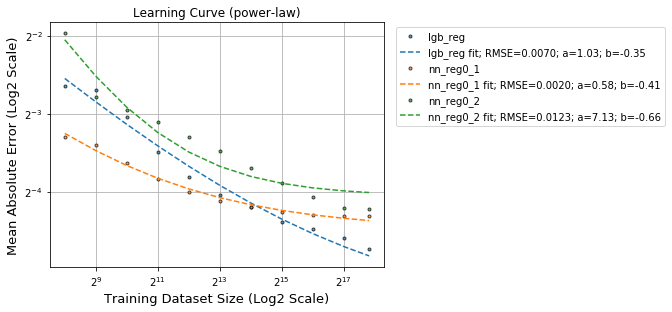

In [122]:
plot_kwargs = {'metric_name': 'mean_absolute_error', 'tr_set': 'te', 'figsize': (6, 4.5), 'xtick_scale': 'log2', 'ytick_scale': 'log2'}
shard_min_idx=1

pp_utils.fit_lc_multi_runs( runs=runs, labels=labels, shard_min_idx=shard_min_idx, **plot_kwargs )

## Top6

How come LGBM is comparable to LS-HPs??

In [136]:
# Top6
maindir = filepath / '../top6_trn/'

lgb_reg_100_dir = maindir / 'split_on_none/top6.lgb_reg.cvf1.ge.dd.auc_2019-11-4_100_trees'
lgb_reg_1000_dir = maindir / 'split_on_none/top6.lgb_reg.cvf1.ge.dd.auc_2019-11-4_1000_trees'
nn_reg0_1_dir = maindir / 'split_on_none/top6.adam.nn_reg0.cvf1.ge.dd.auc_2019-11-18_LS_best_hps'

runs   = [lgb_reg_100_dir, lgb_reg_1000_dir, nn_reg0_1_dir]
labels = ['lgb_reg_100', 'lgb_reg_1000', 'nn_reg0_1']

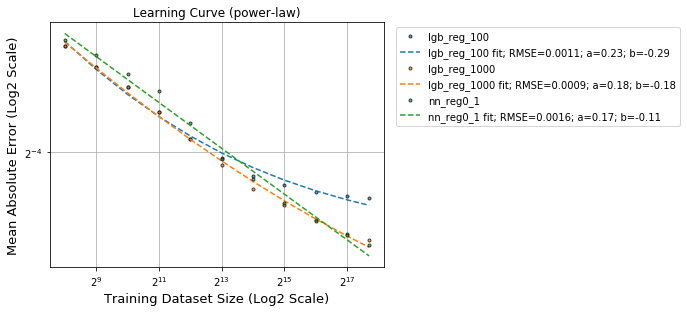

In [137]:
plot_kwargs = {'metric_name': 'mean_absolute_error', 'tr_set': 'te', 'figsize': (6, 4.5), 'xtick_scale': 'log2', 'ytick_scale': 'log2'}
shard_min_idx=1

pp_utils.fit_lc_multi_runs( runs=runs, labels=labels, shard_min_idx=shard_min_idx, **plot_kwargs )

## Comparing datasets

Are the LC plots follow the same trajectory for the overlapping region? If not, what is the cause?<br>
We need to used aggregation over multiple seeds!

In [126]:
# GDSC
maindir = filepath / '../trn.gdsc/'
gdsc_lgb_reg_dir = maindir / 'hpo_lgbm/trn.gdsc/split_on_none/gdsc.lgb_reg.cvf1.GE.DD.AUC_2019-11-21_h10-m10'
# nn_reg0_dir = maindir / 'split_on_none/gdsc.adam.nn_reg0.cvf1.ge.dd.auc_2019-11-20_LS_best_hps_earlystop_valmae'
gdsc_nn_reg0_dlft_valmae_dir = maindir / 'split_on_none/gdsc.sgd.nn_reg0.cvf1.ge.dd.auc_2019-11-20_defaults_earlystop_valmae'

# CTRP
maindir = filepath / '../ctrp_trn/'
ctrp_lgb_reg_dir = maindir / 'split_on_none/ctrp.adam.nn_reg0.cvf1.ge.dd.auc_2019-11-18'
# nn_reg0_1_dir = maindir / 'split_on_none/ctrp.lgb_reg.cvf1.ge.dd.auc_2019-11-4_h16-m38'
ctrp_nn_reg0_2_dir = maindir / 'split_on_none/ctrp.sgd.nn_reg0.cvf1.ge.dd.auc_2019-11-4_h13-m7'

# Top6

runs   = [gdsc_lgb_reg_dir, ctrp_lgb_reg_dir, gdsc_nn_reg0_dlft_valmae_dir, ctrp_nn_reg0_2_dir]
labels = ['gdsc_lgb_reg', 'ctrp_lgb_reg', 'gdsc_nn_reg0_dlft', 'ctrp_nn_reg0_2']

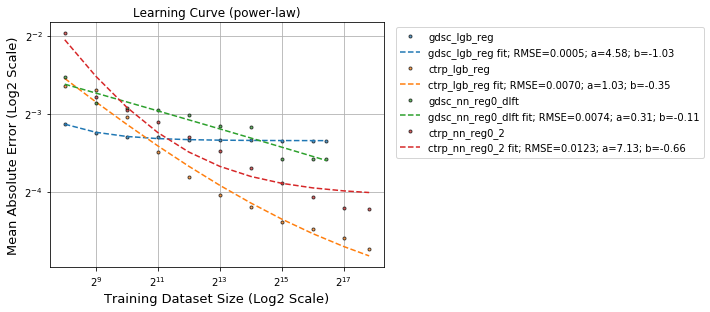

In [127]:
plot_kwargs = {'metric_name': 'mean_absolute_error', 'tr_set': 'te', 'figsize': (6, 4.5), 'xtick_scale': 'log2', 'ytick_scale': 'log2'}
shard_min_idx=1

pp_utils.fit_lc_multi_runs( runs=runs, labels=labels, shard_min_idx=shard_min_idx, **plot_kwargs )

# Old runs (the good results)

In [96]:
def get_xy_(path:str, metric_name:str='mean_absolute_error', tr_set:str='te', shard_min_idx:int=0, cv_folds:int=1):
    """ Extract x and y (tr size and score) for the plot.
    Args:
        tr_set : 'tr', 'vl', 'te'
    Returns:
        x : vector of tr size 
        y : vector of scores
    """
    scores = pd.read_csv( Path(path)/'lrn_crv_scores.csv' )
    df = scores[scores['metric']==metric_name].reset_index(drop=True)

    # fold_col_names = [c for c in df.columns if 'fold' in c]
    fold_col_names = [c for c in df.columns if 'f' in c]
    cols = ['tr_size'] + fold_col_names[:cv_folds]
    dd = df.loc[df['tr_set']==tr_set, cols].sort_values('tr_size').reset_index(drop=True)

    x = dd['tr_size'].values
    # y = dd.iloc[:,1:].mean(axis=1).values # mean over folds
    y = dd.iloc[:,1:].median(axis=1).values # median over folds
    x, y = x[shard_min_idx:], y[shard_min_idx:]
    return x, y

def fit_pwr_multi_runs(runs, labels, metric_name='mean_absolute_error', tr_set=False, shard_min_idx=0,
                       xtick_scale:str='log2', ytick_scale:str='log2', cv_folds=1, figsize=(6, 4.5)):
    prms = []
    for i, r in enumerate(runs):       
        x, y = get_xy_(Path(r), metric_name=metric_name, tr_set=tr_set, shard_min_idx=shard_min_idx, cv_folds=cv_folds)

        if i == 0:
            ax = None
        ax, fit_prms, rmse = lrn_crv_plot.plot_lrn_crv_power_law(x, y, plot_fit=True, metric_name=metric_name,
                                xtick_scale=xtick_scale, ytick_scale=ytick_scale,
                                xlim=None, ylim=None, title=None,
                                label=labels[i], ax=ax, figsize=figsize)

        prms.append( (labels[i], fit_prms) ) # aggregate params
    return prms

[('lgb_reg',
  {'alpha': 12.09187263831906,
   'beta': -0.7766513628332724,
   'gamma': 0.0707256433815079}),
 ('nn_model0',
  {'alpha': 1.2121806710557,
   'beta': -0.35534153457769246,
   'gamma': 0.05457020988442337}),
 ('nn_model1',
  {'alpha': 54.78934957352949,
   'beta': -0.7105021639926878,
   'gamma': 0.05918354428738559})]

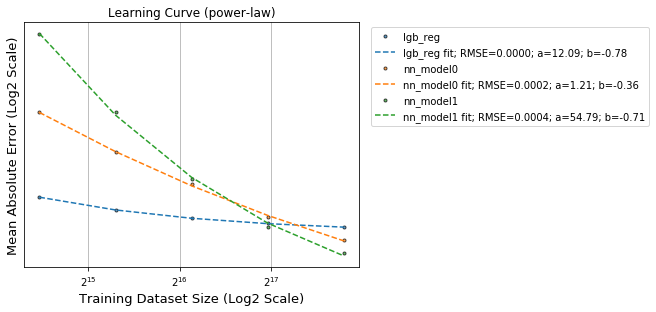

In [97]:
maindir = filepath / '../../pilot1/out/lrn_crv'
lgb_reg_dir       = maindir / 'top6.lgb_reg.cvf5.rna.dsc.AUC1_2019-6-20_h15-m29'
nn_model0_sgd_dir = maindir / 'top6.nn_model0.sgd.cvf5.rna.dsc.AUC1_2019-6-21_h23-m20'
nn_model1_sgd_dir = maindir / 'top6.nn_model1.sgd.cvf5.rna.dsc.AUC1_2019-6-22_h22-m44'

runs   = [lgb_reg_dir, nn_model0_sgd_dir, nn_model1_sgd_dir]
labels = ['lgb_reg', 'nn_model0', 'nn_model1']

plot_kwargs = {'metric_name': 'mean_absolute_error', 'tr_set': False, 'cv_folds': 5, 'figsize': (6, 4.5), 'xtick_scale': 'log2', 'ytick_scale': 'log2'}
# plot_kwargs = {'metric_name': 'mean_absolute_error', 'tr_set': False, 'cv_folds': 5, 'figsize': (6, 4.5), 'xtick_scale': 'linear', 'ytick_scale': 'linear'}
shard_min_idx = 0

fit_pwr_multi_runs(runs=runs, labels=labels, **plot_kwargs, shard_min_idx=shard_min_idx)

# Recent Runs

In [26]:
def get_xy_(path, metric_name='mean_absolute_error', tr_set='te', shard_min_idx=0, cv_folds=1, ):
    scores = pd.read_csv(path/'lrn_crv_scores.csv') # load the scores file
    df = scores[scores['metric']==metric_name].reset_index(drop=True)     

    # tr, vl, te = df[df['set']=='tr'], df[df['set']=='vl'], df[df['set']=='te']
    # tr, vl, te = tr.iloc[:, -cv_folds:], vl.iloc[:, -cv_folds:], te.iloc[:, -cv_folds:]

    cols = ['tr_size'] + ['fold'+str(f+1) for f in range(cv_folds)]
    dd = df.loc[df['set']==tr_set, cols].sort_values('tr_size').reset_index(drop=True)

    x = dd.tr_size.values
    y = dd.iloc[:,1:].mean(axis=1).values # mean over folds        
    x, y = x[shard_min_idx:], y[shard_min_idx:]
    return x, y


def fit_pwr_multi_runs(runs, metric_name='mean_absolute_error', tr_set='te', cv_folds=1,
                       shard_min_idx=0, xtick_scale='log2', ytick_scale='log2'):
    prms = []
    for i, r in enumerate(runs):        
        x, y = get_xy_(path=r['dir'], metric_name=metric_name, cv_folds=cv_folds, tr_set=tr_set)
        
        if i == 0: ax = None
        ax, pwr_law_params = lrn_crv_plot.plot_lrn_crv_power_law(
            x=x, y=y,
            plot_fit=True, metric_name=metric_name,
            xtick_scale=ytick_scale, ytick_scale=ytick_scale,
            marker='.', alpha=0.7,
            label=r['name'], ax=ax, figsize=(8,6),
            title='Learning Curves')        
        
        prms.append( (r['name'], pwr_law_params) ) # aggregate params
    return prms

In [27]:
maindir = filepath / '../gdsc_trn/split_on_none'  # Results dir
# maindir = filepath / '../ctrp_trn/split_on_none'  # Results dir
# maindir = filepath / '../top6_trn/split_on_none'  # Results dir

# lgb_reg_auc_dir1 = maindir / 'gdsc.lgb_reg.cvf1.GE.DD.AUC_2019-11-4_h10-m18'
# lgb_reg_auc_dir2 = maindir / 'gdsc.lgb_reg.cvf1.GE.DD.AUC_2019-11-4_h10-m20'
# runs = [{'name': 'LGBM 100 trees',  'dir': lgb_reg_auc_dir1},
#         {'name': 'LGBM 1000 trees', 'dir': lgb_reg_auc_dir2}]

# rf_reg_auc_dir1 = maindir / 'gdsc.rf_reg.cvf1.GE.DD.AUC_2019-11-4_h10-m33'
# rf_reg_auc_dir2 = maindir / 'gdsc.rf_reg.cvf1.GE.DD.AUC_2019-11-4_h10-m48'
# runs = [{'name': 'RF 100 trees',  'dir': rf_reg_auc_dir1},
#         {'name': 'RF 1000 trees', 'dir': rf_reg_auc_dir2}]

lgb_reg_auc_dir2 = maindir / 'gdsc.lgb_reg.cvf1.GE.DD.AUC_2019-11-4_h10-m20'
rf_reg_auc_dir2 = maindir / 'gdsc.rf_reg.cvf1.GE.DD.AUC_2019-11-4_h10-m48'
nn_reg_auc_dir = maindir / 'gdsc.adam.nn_reg0.cvf1.GE.DD.AUC_2019-11-3_h14-m30'
nn_reg_auc_clr_dir = maindir / 'gdsc.sgd.trng1.nn_reg0.cvf1.GE.DD.AUC_2019-11-5_h15-m55'
runs = [{'name': 'LGBM 1000 trees', 'dir': lgb_reg_auc_dir2},
        {'name': 'RF 1000 trees', 'dir': rf_reg_auc_dir2},
        {'name': 'NN_REG0', 'dir': nn_reg_auc_dir},
        {'name': 'NN_REG0 clr', 'dir': nn_reg_auc_clr_dir}]

# nn_reg_auc_dir1 = maindir / 'gdsc.sgd.nn_reg0.cvf1.GE.DD.AUC_2019-11-3_h14-m35'
# nn_reg_auc_dir2 = maindir / 'gdsc.adam.nn_reg0.cvf1.GE.DD.AUC_2019-11-3_h14-m30'
# runs = [{'name': 'NN_REG0 SGD', 'dir': nn_reg_auc_dir1},
#         {'name': 'NN_REG0 ADAM', 'dir': nn_reg_auc_dir2}]

# lgb_reg_auc_dir = maindir / 'ctrp.lgb_reg.cvf1.GE.DD.AUC_2019-11-4_h16-m38'
# nn_reg_auc_dir = maindir / 'ctrp.sgd.nn_reg0.cvf1.GE.DD.AUC_2019-11-4_h13-m7'
# runs = [{'name': 'lgb_reg', 'dir': lgb_reg_auc_dir},
#         {'name': 'nn_reg0 sgd', 'dir': nn_reg_auc_dir}]

# nn_reg_auc_dir = maindir / 'top6.adam.nn_reg0.cvf1.GE.DD.AUC_2019-11-4_h14-m46'
# lgb_reg_auc_dir1 = maindir / 'top6.lgb_reg.cvf1.GE.DD.AUC_2019-11-4_h18-m10'
# lgb_reg_auc_dir2 = maindir / 'top6.lgb_reg.cvf1.GE.DD.AUC_2019-11-4_h18-m38'
# runs = [{'name': 'nn_reg',  'dir': nn_reg_auc_dir},
#         {'name': 'lgb_reg 100', 'dir': lgb_reg_auc_dir1},
#         {'name': 'lgb_reg 1000', 'dir': lgb_reg_auc_dir2}]

FileNotFoundError: [Errno 2] File b'/vol/ml/apartin/projects/LearningCurves/notebooks/../gdsc_trn/split_on_none/gdsc.adam.nn_reg0.cvf1.GE.DD.AUC_2019-11-3_h14-m30/lrn_crv_scores.csv' does not exist: b'/vol/ml/apartin/projects/LearningCurves/notebooks/../gdsc_trn/split_on_none/gdsc.adam.nn_reg0.cvf1.GE.DD.AUC_2019-11-3_h14-m30/lrn_crv_scores.csv'

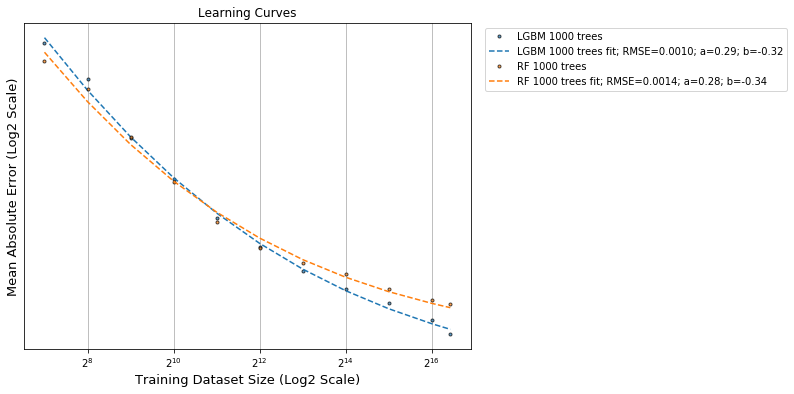

In [28]:
fit_pwr_multi_runs(runs, metric_name='mean_absolute_error', tr_set='te', shard_min_idx=4, cv_folds=1, xtick_scale='log2', ytick_scale='log2')